# Project 3: Singular Value Decomposition

SVD is is fundamental to numerical analysis and linear algebra. We will do a few applications in this project.

## Line fitting revisit
As one application of least square, we can fit many (2D) data points with a line. First execute the following command to load the points into an array (Points). Each row will be a point. You need to download Points.csv into the same folder as this notebook.

In [2]:
import numpy as np
Points = np.loadtxt('Points.csv', delimiter=',')

(1) Use least square to find the line y = a+bx that best fits these points. You can use the np.linalg.solve function directly. Print a,b.

In [3]:
x = Points[:,0]
y = Points[:,1]
A = np.ones([len(x),2])
A[:,1] = x
c = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, y))
print c

[ 1.48025058  1.94055053]


(2) Plot the line and these points in the same plot below.

In [4]:
np.mean(x)

-0.11604518785683367

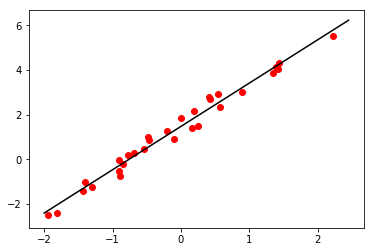

In [5]:
import matplotlib.pyplot as plt
def l(x): return c[0] + c[1]*x
d = np.arange(-2,2.5,0.05)
plt.plot(d,l(d),'k')
plt.scatter(x,y,color='r')
plt.show()

SVD can also do line fitting as well,  using rank-1 approximation since a line is a one-dimensional object. We first have to shift the points so that its centroid is the origin. This is because the rank-1 approximation that we get from SVD is always a subspace (meaning it will go through origin).

(3) Compute the center of these 30 points, and subtract this center from each row of Points. Call this new array CP. Section 5.2 of the notes could be helpful.

In [6]:
px = np.copy(x)
py = np.copy(y)
cx = x - np.mean(x)
cy = y - np.mean(y)
CP = Points
CP[:,0] = cx
CP[:,1] = cy

(4) Find the rank-1 approximation of CP (using np.linalg.svd, better read the documentation of np.linalg.svd first to figure out the outputs.), call it CP1.  Print CP1.

In [7]:
[u,s,v] = np.linalg.svd(CP)
CP1 = s[0]*np.outer(u[:,0], v[0,:])
print CP1

[[-0.50379919 -0.99461092]
 [ 0.1784621   0.35232361]
 [-0.74428356 -1.46938022]
 [-1.17646888 -2.32260953]
 [-0.9564613  -1.88826597]
 [-1.88082975 -3.71317354]
 [-0.1734871  -0.34250187]
 [-1.24895109 -2.46570543]
 [-0.56260792 -1.11071235]
 [-0.3956784  -0.7811566 ]
 [ 0.42324299  0.83557519]
 [ 0.70034756  1.38264084]
 [ 1.55998282  3.07975079]
 [ 0.27313804  0.53923485]
 [ 1.43213394  2.82734887]
 [-1.34515357 -2.65563038]
 [-0.12483179 -0.24644553]
 [-0.00605212 -0.01194822]
 [-1.82418803 -3.60135027]
 [-0.67664885 -1.33585435]
 [ 0.72074433  1.42290858]
 [ 1.35484068  2.67475489]
 [ 1.46422151  2.89069682]
 [ 0.58148689  1.14798361]
 [ 0.11094459  0.21902913]
 [ 0.90892051  1.79440993]
 [ 2.20952835  4.36209721]
 [ 0.80893603  1.59701848]
 [-0.22326365 -0.44077177]
 [-0.88422515 -1.74565584]]


(5) CP1 has rank-1 and approximates CP. This means all rows of CP **approximately** lie on the line spanned by rows of CP1. If we shift this line back to the centroid of CP, that is the best fitting line obtained from SVD.

Below print out the slope of this line, then plot this new line (in blue), the LS best fitting line (in black), and all 30 points (in read) simultineously. These two lines almost overlap, but are different.

1.97422097254


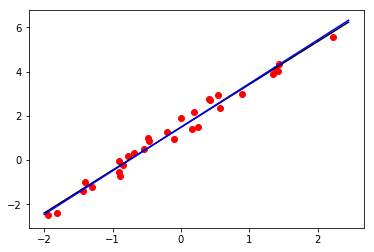

In [8]:
s = v[0,1]/v[0,0]
print  s
def svdl(x): return s*(x - np.mean(px)) + np.mean(py)
d = np.arange(-2,2.5,0.05)
plt.plot(d,l(d), 'k', d, svdl(d),'b')
plt.scatter(px,py,color='r')
plt.show()

## Data compression. Follow Section 5.2 of notes.

This can be used in machine learning. Suppose that the m × d matrix, stores a set of training data with each training vector taking up one row as in (5) and that d, the dimension of each vector, is very large.

We want to feed data to a clustering algorithm that outputs a fixed number of cluster centers. Because d is large, however, the algorithm takes too long or is unstable, so we want to reduce the number of variables using SVD.

(6) Data.csv stores certain information of 1000 people. Each row is a person. First load this to a numpy array, call it Data

In [9]:
Data = np.loadtxt('Data.csv', delimiter=',')

(7) Center the data the generate the matrix E. Hint: It is not necessary to use a loop to generate E. Try np.outer(np.ones([1,10]), np.array([1,2])) to get some inspiration.

In [10]:
def centerData(p):
    m = p.shape[0]
    return p - np.outer(np.ones([1,m]), np.mean(p,axis=0))
E = centerData(Data)

(8) Compute SVD of E. Print out the singular values. You will observe that only the first few are significant. Let r be the the number of these significant singular values. What is r?

In [11]:
[u,s,v] = np.linalg.svd(E)
print s
# pick r=4

[  7.67491328e+02   5.73705165e+02   5.11702580e+02   4.70437615e+02
   3.83184381e-01   3.75234119e-01   3.68941997e-01   3.63145285e-01
   3.60251959e-01   3.58119529e-01   3.57013327e-01   3.53086884e-01
   3.51345030e-01   3.45434792e-01   3.42460140e-01   3.41999626e-01
   3.38496625e-01   3.37525363e-01   3.31782006e-01   3.29942119e-01
   3.26117313e-01   3.24041857e-01   3.22787831e-01   3.19548326e-01
   3.18180394e-01   3.15315933e-01   3.14796978e-01   3.09734782e-01
   3.08147675e-01   3.07667687e-01   3.05695878e-01   3.02885250e-01
   3.01130429e-01   2.98041915e-01   2.93918459e-01   2.91528644e-01
   2.90432678e-01   2.87808318e-01   2.85953000e-01   2.82227529e-01
   2.79426344e-01   2.78262531e-01   2.74037220e-01   2.71102309e-01
   2.69294247e-01   2.68022194e-01   2.62441743e-01   2.56250798e-01
   2.54161299e-01   2.48959724e-01]


(9) Generate matrices $Y, \hat V (\text{name it HatV})$ and the center $c$.

In [12]:
HatV = v[:4,:] #picking first 4 rows of v due to the python svd function
HatV = HatV.T #need to take transpose to fit textbook definition
Y = E.dot(HatV)
c = np.mean(Data, axis=0)

(10) If everything goes smoothly, you can use the following command to Store $Y, \hat V, c$ to "compressedData.csv". This file should be uploaded to github. 

In [203]:
np.savetxt('compressedData.csv', Y, delimiter=',')
f_handle = file('compressedData.csv', 'a')
np.savetxt(f_handle, HatV, delimiter=',')
np.savetxt(f_handle, c, delimiter=',')
f_handle.close()

(11) You can see that this file size is smaller than "Data.csv". What is the compression rate?

In [13]:
#original size is 1.3mb. compressed file is 108 kb
108.0/1300

0.08307692307692308

(12) Use $Y, \hat V, c$ to get the approximate Data matrix. Call the approximate Dapprox. Print the first row of Data and Dapprox to compare.

In [14]:
Ep = Y.dot(HatV.T)
Dapprox = Ep + np.outer(np.ones([1000,1]), c)
print Data[0,:] 
print Dapprox[0,:]

[ 17.3241816   16.23212003  -8.9312805   18.00792491  10.43039008
  11.22893626   8.63427885  -1.97624742   5.08101872  11.19727172
 -10.59405535  19.41724094  20.99057358  23.58187695   4.35431818
  29.07055537  13.61160546   7.89031917 -11.12786195   2.49774348
   9.71247221   4.68626824   2.88153319  14.26041399  -0.85409691
   4.22766731  12.02448608  17.36195307  10.03861149  16.51132435
  12.69269229   2.34676899  11.33534159  14.51134539  -4.59691885
  23.28604731  26.64288732   7.52637087  15.4524931   15.00411118
  27.93735859  21.55571026   5.67363089  35.19319894  -1.22794433
  23.44559525  -4.68146328   4.07923186   8.46878036  -8.30600566]
[ 17.32173589  16.24088696  -8.9320416   18.00235299  10.42011958
  11.2349778    8.62653511  -1.98825241   5.08342212  11.20541102
 -10.6021035   19.42956924  20.99691023  23.5897745    4.37705099
  29.06123621  13.60063685   7.88026687 -11.11627687   2.48410722
   9.73549605   4.6764981    2.88130493  14.2639475   -0.85853759
   4.2263

### Finally, we probably will do more projects on SVD using this one.